In [ ]:
from classification_dogs.scripts.dataset import get_ds
from classification_dogs.scripts.utils import plot_class_dist, plot_size_dist, show_rand_img, show_aug_img

data_dir = '../data/imagewoof2-160'

**Распределение**

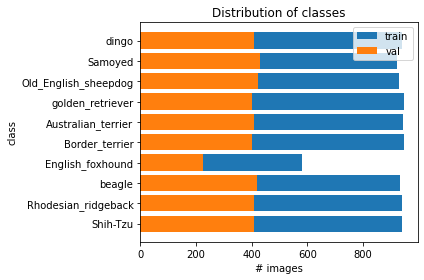

In [ ]:
plot_class_dist(data_dir)

height = [160, 391]
width = [160, 615]


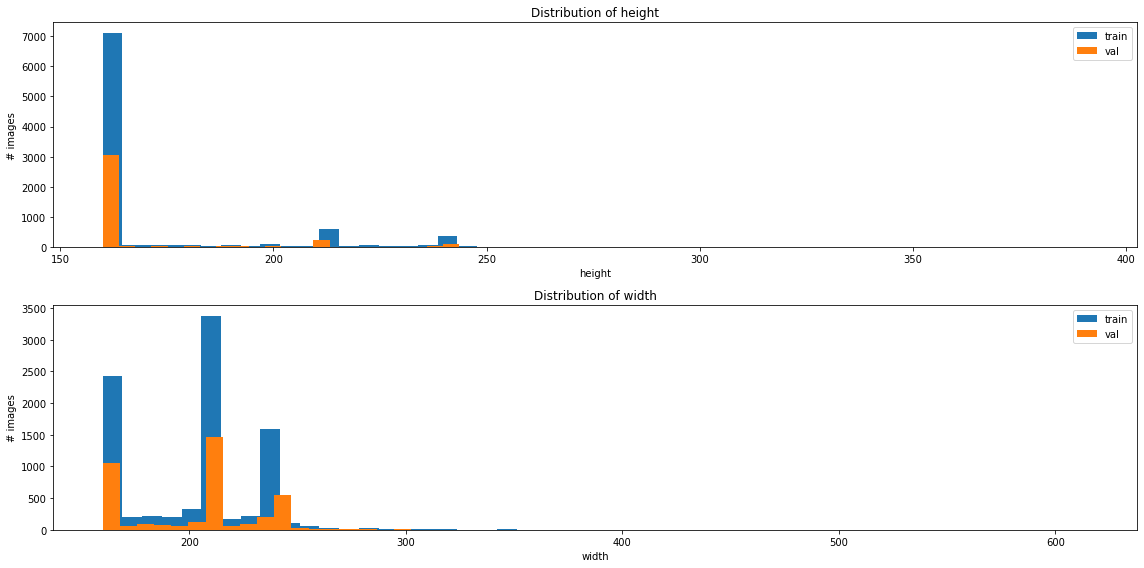

In [ ]:
plot_size_dist(data_dir)

**Примеры**

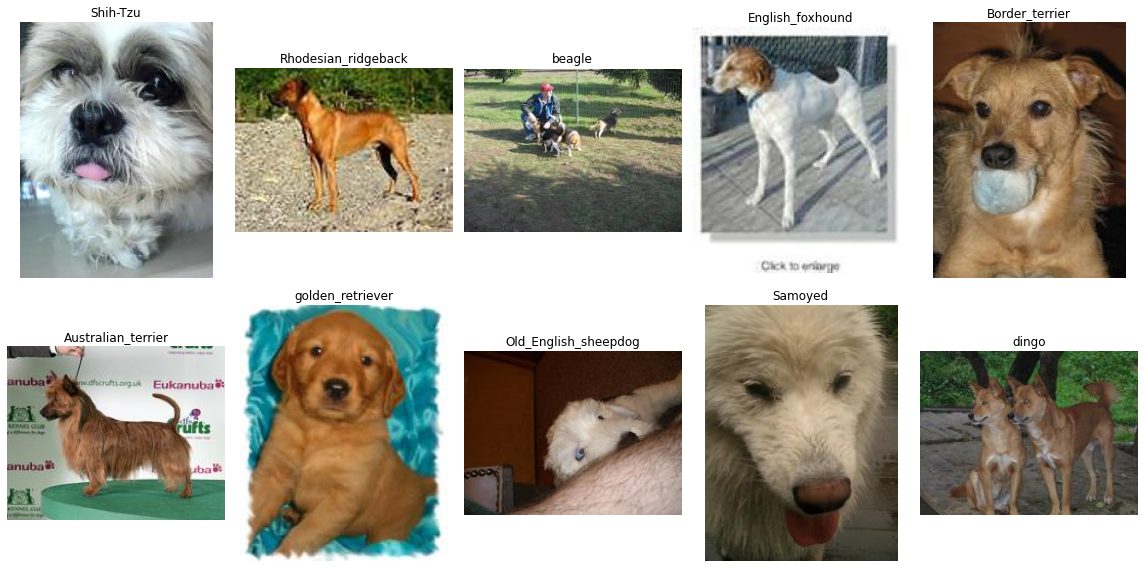

In [ ]:
show_rand_img(data_dir)